In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from tqdm import tqdm
from scipy.optimize import curve_fit #used for curve fitting
import random
import math

In [2]:
f = lambda rho_g,rho_f,phi: (1-phi)*rho_g + (phi)*rho_f


In [3]:
phi =  np.array([0.35,0.05,0.35,0.25,0.25,0.1,0.0001]);
phi = np.array([0.2,0.01])

rho_g = np.array([2500,3500,2900,3100,2900,3100,3300]);
rho_g = np.array([2500,3300])
rho_f = np.array([0.00002,0.00002,0.00002,0.00002,1,1,1])*1e3;# %kg/m3. density of pore fluid
rho_f = np.array([1,1])
bulk = []

for i in range(0,len(phi)):
    bulk.append(f(rho_g[i],rho_f[i],phi[i]))
bulk

[2000.2, 3267.01]

In [2]:
def hex_to_area(hex_num):
    hex_width = 40 #hex width in km
    hex_area = (hex_width*0.9306049)**2
    return hex_area*hex_num
def area_to_hex(area):
    hex_width = 40 #hex width in km
    hex_area = (hex_width*0.9306049)**2
    hex_num = area/hex_area
    return hex_num

In [3]:
def area_by_pop(pop_total,pop_rho):
    #Method 1: Use the total population to find the region's area
    region_area = pop_total/pop_rho #in kilometers
    
    hex_num = area_to_hex(region_area)
    print("Total population of the region: ",pop_total)
    print("Total area of the region: ",np.round(region_area,2),"sq km or",'{:e}'.format(region_area) ,"; in hexes: ",hex_num)
    #print("Total area of the region, square km: ",region_area_km," or ",'{:e}'.format(region_area_km))
    print("Total area of the region, square Mm: ",np.round(region_area/1e6,2))
    return region_area

In [4]:
def pop_by_area(hex_num,pop_rho):
    #Method 2: Use the hex num to find the region's area and total population
    #equation: total_pop = A*rho; A = total_pop / rho    

    region_area = hex_to_area(hex_num) #in square miles
    pop_total = round(region_area*pop_rho)
    print("Total population of the region: ",pop_total)
    print("Total area of the region: ",region_area,"square km; in hexes: ",hex_num)
    return [pop_total,region_area]

def pop_by_area_sqkm(area,pop_rho):
    #Method 2: Use the square kilometer area to find total population
    #equation: total_pop = A*rho; A = total_pop / rho    

    region_area = area 
    pop_total = round(region_area*pop_rho)
    print("Total population of the region: ",pop_total)
    print("Total area of the region: ",region_area,"square km")
    return pop_total

In [5]:
pop_by_area_sqkm(0.58e6,8)

Total population of the region:  4640000
Total area of the region:  580000.0 square km


4640000

In [6]:
#Some population density examples:
#Aurignation, Paleolithic: 0.0036 - 0.036
#Medieval country: 30 (harsh) - 120 (prosperous)

#Historical examples:
#Medes, 600 BC: pop 17-35 mil, area 3.0 Mm, rho = 15-30
#Persian empire / Achaemenid empire, 500 BC: pop ~50 mil, area 5.5 Mm, rho = 24
#Han China, 2 AD: pop 57.6 mil, area 6.2 Mm, rho = 24
#Roman empire ? AD: pop ~55 mil, area 4.4 Mm ? , rho = 32
#Modern Maasai people: pop ~1.1 - 1.5 mil, area ~160,000 sq km, rho ~ 18 - 20

#Mongol empire, 1300 AD, pop ~100 mil, area 18-24 Mm, rho = 14-11

pop_rho = 2*0.386102 #population density per sq km
pop_total = 3e5#5.29e6
hex_num = 10 #number of hexes the region envelopes. Can be decimal approx.

region_area = area_by_pop(pop_total,pop_rho)

Total population of the region:  300000.0
Total area of the region:  388498.38 sq km or 3.884984e+05 ; in hexes:  280.3745278659765
Total area of the region, square Mm:  0.39


In [7]:
pixel_size = 5.16 #km at equator
pop_initial = 10e6
pop_final = 23e6
region_area_init = area_by_pop(pop_initial,pop_rho)
region_area_final = area_by_pop(pop_final,pop_rho)
print("Area difference between initial and final: ",(region_area_final-region_area_init))
r_init = np.sqrt((region_area_init)/np.pi)
r_final = np.sqrt((region_area_final)/np.pi)
print("Circular radius difference between initial and final: ",r_final-r_init," km, ",(r_final-r_init)/pixel_size," pixels at equator")

Total population of the region:  10000000.0
Total area of the region:  12949945.87 sq km or 1.294995e+07 ; in hexes:  9345.81759553255
Total area of the region, square Mm:  12.95
Total population of the region:  23000000.0
Total area of the region:  29784875.5 sq km or 2.978488e+07 ; in hexes:  21495.380469724863
Total area of the region, square Mm:  29.78
Area difference between initial and final:  16834929.629994147
Circular radius difference between initial and final:  1048.7995666086922  km,  203.25572996292485  pixels at equator


In [8]:
pop_by_area_sqkm(1.3e6,1.8*0.386102)

Total population of the region:  903479
Total area of the region:  1300000.0 square km


903479

In [9]:
def geograph_dist(pop_total,era=0):
    
    #Population spread

    #village bounds: 20 - 1000; commonly 50 - 300
    village_avg = 150
    #town bounds: 1000 - 8000; commonly 2500
    town_avg = 2500
    town_lbound = 1000
    #city bounds: 8000 - 12000
    city_lbound = 8000
    #big city bounds: 12000 - 100000

    settlements = []
    #randomly generate population of the largest city
    neolithic = 0
    if neolithic:
        settlements.append(round(np.sqrt(pop_total)*(random.randint(1,4)+random.randint(1,4)+0)))
    else:
        settlements.append(round(np.sqrt(pop_total)*(random.randint(1,4)+random.randint(1,4)+10)))    
    #pop_largest_city = round(np.sqrt(pop_total)*(random.randint(1,4)+random.randint(1,4)+10))
    print("Population of the largest city: ",settlements[0])
    #settlements.append(25400)
    settlements.append(round(settlements[0]*(random.randint(1,4)+random.randint(1,4))*0.1))
    print("Population of the second largest city: ",settlements[1])

    #Next we can use the largest and second largest settlements to gernerate the rest.
    #For a post-Crusades style society with a robust mercantile system, there are a large number
    #of towns corresponding to each city. However for pre-Crusades systems, where trade is typically
    #localized, there is a much smaller number of towns. More people are rural in this system.
    post_mercantile = 0
    if post_mercantile:
        multiplier = 1-((random.randint(1,4)+random.randint(1,4))*0.05)
        while round(settlements[-1]*multiplier) >= city_lbound:
            settlements.append(round(settlements[-1]*multiplier))
            multiplier = 1-((random.randint(1,4)+random.randint(1,4))*0.05)
            #print(settlements)
        print("Array of notable cities: ",settlements)

        #Next level down: towns.
        cities = [x for x in settlements if x > city_lbound]
        towns_num = len(cities)*(random.randint(1,8)+random.randint(1,8))
        print("Number of towns: ",towns_num, "each with avg pop: ",town_avg)
        towns_total = towns_num*town_avg
        print("Total population of towns: ",towns_total)

        total_urban_pop = towns_total+sum(settlements) 
    else:
        multiplier = 1-((random.randint(1,4)+random.randint(1,4))*0.05)
        while round(settlements[-1]*multiplier) >= town_lbound:
            settlements.append(round(settlements[-1]*multiplier))
            multiplier = 1-((random.randint(1,4)+random.randint(1,4))*0.05)
            #print(settlements)
        print("Array of notable cities and towns: ",settlements)

        #Next level down: towns.
        towns = [x for x in settlements if x < city_lbound]
        towns_num = len(towns)
        print("Number of towns: ",towns_num)
        towns_total = sum(towns)
        print("Total population of towns: ",towns_total)

        total_urban_pop = sum(settlements)

    if towns_num > 0:    
        town_rho = region_area / towns_num
    else:
        town_rho = region_area        

    print("Total urban population: ",total_urban_pop)
    total_rural_pop = pop_total - total_urban_pop
    print("Total rural population: ",total_rural_pop)
    village_num = round(total_rural_pop/village_avg)

    #From a Magical Medieval Society
    manor_num = round(total_rural_pop/450)
    print("Estimate of the number of small villages: ",village_num)
    print("Estimate of the number of manors: ",manor_num)
    print("Estimate of the number of small villages per manor: ",village_num/manor_num)
    print("Number of square km per town: ",town_rho)
    
    #Distribution of Land
    #How much land is arible vs wilderness? An average square mile of arable farmland
    #can support 180 people. This number can vary with the amount of magic available to the society or
    #other environmental factors.
    support_factor = 180*0.3861018 # per square MILE, to convert to square km, need to multiply by 0.3 ish 
    farmland = round(pop_total / support_factor)
    print("\n\nAmount of cultivated land: ", farmland," sq km.")
    print("This is ", round((farmland/region_area)*100),"% of the total region's area.")

    if post_mercantile:
        if towns_num > 0:
            print("Number of square km per town considering only cultivated land: ",round(farmland / towns_num))
            print("Number of km between towns within a cluster: ", round(np.sqrt(farmland / towns_num)))
        else:
            print("Number of square km per town considering only cultivated land: ",farmland)
            print("Number of km between towns within a cluster: ", round(np.sqrt(farmland)))
    else:
        print("Number of square km per town considering only cultivated land: ",round(farmland / len(settlements)))
        print("Number of km between towns within a cluster: ", round(np.sqrt(farmland / len(settlements))))

    return [total_urban_pop,total_rural_pop,village_num]

In [10]:
41500-4000

37500

In [44]:
pop_total = 400000#1.1e6 #486962

#Some population density examples:
#Aurignation, Paleolithic: 0.0036 - 0.036
#Medieval country: 30 (harsh) - 120 (prosperous)

#Historical examples:
#Medes, 600 BC: pop 17-35 mil, area 3.0 Mm, rho = 15-30
#Persian empire / Achaemenid empire, 500 BC: pop ~50 mil, area 5.5 Mm, rho = 24
#Han China, 2 AD: pop 57.6 mil, area 6.2 Mm, rho = 24
#Roman empire ? AD: pop ~55 mil, area 4.4 Mm ? , rho = 32
#Modern Maasai people: pop ~1.1 - 1.5 mil, area ~160,000 sq km, rho ~ 18 - 20

#Mongol empire, 1300 AD, pop ~100 mil, area 18-24 Mm, rho = 14-11
pop_rho = 30*0.386102 #population density per sq km
region_area = area_by_pop(pop_total,pop_rho)

total_urban_pop,total_rural_pop,village_num = geograph_dist(pop_total)

Total population of the region:  400000
Total area of the region:  34533.19 sq km or 3.453319e+04 ; in hexes:  24.922180254753467
Total area of the region, square Mm:  0.03
Population of the largest city:  8854
Population of the second largest city:  4427
Array of notable cities and towns:  [8854, 4427, 3984, 2988, 2390, 1912, 1530, 1148]
Number of towns:  7
Total population of towns:  18379
Total urban population:  27233
Total rural population:  372767
Estimate of the number of small villages:  2485
Estimate of the number of manors:  828
Estimate of the number of small villages per manor:  3.001207729468599
Number of square km per town:  4933.312712086197


Amount of cultivated land:  5756  sq km.
This is  17 % of the total region's area.
Number of square km per town considering only cultivated land:  720
Number of km between towns within a cluster:  27


In [38]:
# #Distribution of Land
# #How much land is arible vs wilderness? An average square mile of arable farmland
# #can support 180 people. This number can vary with the amount of magic available to the society or
# #other environmental factors.
# support_factor = 180*0.3861018 # per square MILE, to convert to square km, need to multiply by 0.3 ish 
# farmland = round(pop_total / support_factor)
# print("Amount of cultivated land: ", farmland," sq km.")
# print("This is ", round((farmland/region_area)*100),"% of the total region's area.")

# if post_mercantile:
#     if towns_num > 0:
#         print("Number of square km per town considering only cultivated land: ",round(farmland / towns_num))
#         print("Number of km between towns within a cluster: ", round(np.sqrt(farmland / towns_num)))
#     else:
#         print("Number of square km per town considering only cultivated land: ",farmland)
#         print("Number of km between towns within a cluster: ", round(np.sqrt(farmland)))
# else:
#     print("Number of square km per town considering only cultivated land: ",round(farmland / len(settlements)))
#     print("Number of km between towns within a cluster: ", round(np.sqrt(farmland / len(settlements))))


## Deity Pool from Demographics

In [39]:
#Deity Pool
# This is all based on Greek pantheon, where we have 12 major deities (abilities of 30 average)
# and 400 minor deities (abilities of 18 average)
# This gives the Greek people (with a population of 13 million) a 91 J/s grant to the deity pool, of an arbitrary 500 J/s bleedoff.

#Derivation:
#15.9e9 Joules / Ability Point
#average of 60 ability points which can replenish each week, so:
#(60*15.9e9) / (7*24*3600) = 1.577e6 J/s flows through a person's soul.
#Of this, let's say 91 are used to support the person's beliefs. This is 0.000057, or 0.0057% of their energy each second.
joules_per_second = 91
deity_constant = (joules_per_second*3600*24*7)/(15.9e9) #the constant multiple representing the number of ability points / week / person
print(deity_constant)
#This is saying that, over
#deity_pool = deity_constant*pop_total #multiplying that constant by the population to figure out the number of ability points / week
deity_pool = deity_constant*(total_urban_pop+total_rural_pop*0.1) #estimating that most of the rural population don't fully worship the
                                                                    #deities in the same way that urbanites with close access
                                                                    #to temples do.
        
deity_pool_full = deity_constant*(total_urban_pop+total_rural_pop)

#deity_pool = deity_constant*test_pop

print("Deity pool: ",deity_pool," out of ",deity_pool_full)
majordeity = 30*6 #This is approximating the AVERAGE ability score of a major deity is 30
minordeity = 20*6 #This is approximating the AVERAGE ability score of a minor deity is 20 ish
spirit = 30/6 #based on air elemental

print("Max major deities supported: ",deity_pool/majordeity)

numMajor = np.floor(deity_pool/majordeity)
print("Number of possible minor deities with ",numMajor," major deities: ",(deity_pool-(numMajor*majordeity))/minordeity )


village_test_num = 250 #number of villages, on average, to support one minor deity

#radius of village subset, square km
village_density = ((region_area)/village_num)
village_subset_area = village_test_num*village_density
width_of_regional_belief = np.sqrt(village_subset_area)/(np.pi)
print("Village density: ",village_density, " square kilometers per village")
print("Width of regional belief from small villages sufficient to create one minor deity: ",width_of_regional_belief)
print("Number of divine continuances: ",village_num/village_test_num)

0.003461433962264151
Deity pool:  211.66980208301888  out of  1384.5735849056605
Max major deities supported:  1.1759433449056604
Number of possible minor deities with  1.0  major deities:  0.26391501735849066
Village density:  41274.72787004388  square kilometers per village
Width of regional belief from small villages sufficient to create one minor deity:  1022.4974672717083
Number of divine continuances:  10.04


In [33]:
deity_constant*60000

207.68603773584906

In [23]:
#For weather modifying divine continuance, 1.16333175962 km^2 per ability point of deity, ish


0.003461433962264151

## Level Distribution from Demographics

In [13]:
#From the Alexandrian, https://thealexandrian.net/wordpress/587/roleplaying-games/dd-calibrating-your-expectations-2


In [14]:
#For this section, if I want to use a different population total, change it here:

#pop_total = 1.8e6 #an example of a "civilization generation" or the growth of a human civilization in 13 generations.
#pop_total = 0.48e6 #a "civilization generation" for an astar civilizatoin
#pop_total = 84000 #a Waithi civilization-generation

#So what I've learned from the poppyr file is that each race can easily support a similar growth rate,
#So their "generation" sizes are actually going to be proportional to their lifespan--much larger for
#longer-lived peoples.
#For an initial population of 10e6 and a standard growth rate of 0.04%:
#Human generation, 27 years: 100,000
#Astar generation, 120 years: 120,000
#Far Ul generation, 2000 years: 12,000,000
pop_total_base = 100000
pop_total = 100000

#Longer lived races have more people per generation, 

In [15]:
xp_peryear = 6500/50
xp_peryear*25000

3250000.0

In [16]:
def normpdf(x, mean, sd):
    var = float(sd)**2
    denom = (2*math.pi*var)**.5
    num = math.exp(-(float(x)-float(mean))**2/(2*var))
    return num/denom

In [17]:
#The results of this function tell how many people born in a given generation will likely
#reach a certain level. For example, it is rare for many humans of a given generation to ever
#progress beyond the 5th level. This does NOT mean that these people reach the levels described
#within the timespan of a single generation. A human might not reach level 5 until they are elderly.
def get_class_distro(pop_total,race = "human"):
    
    #About 5% of a population can be considered "elite" in their ability scores.
    #Of these people, let's say x% take advantage of their gifts, where those x% are motivated.

    motivated = 0.25
    pop_classed = round(pop_total*0.1*motivated)
    
    heroes = 0
    #establish what we're working with:
    print("Total number of classed individuals: ",pop_classed)
    
    #I believe that races with longer lifespans will have more people with class levels due to
    #the longer time allowed to perfect their skills. The standard deviation reflects that.
    
    if race == "human":
        #For humans: level 5 is the once in a generation level; the 3rd standard deviation.
        std = 5/3
    elif race == "astar":
        #For astar: with lives an average of 300 years--and pushing a maximum of 1000 years,
        #astar are able to develop their abilities much more than the average human.
        #For the astar, level 9 is the once in a generation standard.
        std = 7/3
    elif race == "waith":
        #For the waith, level 18 is the once in a generation standard.
        std = 9/3
    else:
        print("Not available race.")
        return 0
    
    net_CR =[]
    breakpoint = std*2
    for level in range(1,21):
        npcs = round(2*pop_classed*normpdf(level,1,std),4)
        if npcs > 1:
            print("Level " + str(level) + ":\t",npcs)
            if level <= breakpoint:
                net_CR.append(npcs*level*(1/4))
            
            floatingpoint = breakpoint%1 #int(str(std-int(std))[1:]) 
            if floatingpoint != 0:
                if level == np.ceil(breakpoint):
                    net_CR.append(npcs*level*(1/4)*floatingpoint)
        else:
            if npcs > 1e-4:
                print("Level " + str(level) + ":\t",npcs," or 1 per " + str(round(1.0/npcs,1)) + " generations")
            else:
                print("Level " + str(level) + ":\t",npcs)
        if level >= 10:
            heroes += npcs
    
    print("68% of class holders fall below level: ",breakpoint/2)
    print("95 fall below: ",breakpoint)
    print("\nTotal CR:",np.sum(net_CR))
    print("\n\nNumber of NPCs over level 10: ",heroes)

In [18]:
#Once we know how many people of a given generation will likely reach a certain level,
#we should acknowledge that for longer-lived races, many generations may be alive at a single time.

#This is normalized, though, by the idea that the progression along these levels is not instantaneous,
#and in fact could be spread along many generations.

#pop_total = 21014*12.5 #waith generation; pop = 15e6
pop_total = pop_total_base
#num generations living at a time: up to 12.5
get_class_distro(pop_total,"waith")

Total number of classed individuals:  2500
Level 1:	 664.9038
Level 2:	 628.972
Level 3:	 532.4133
Level 4:	 403.2845
Level 5:	 273.3501
Level 6:	 165.7952
Level 7:	 89.9849
Level 8:	 43.7031
Level 9:	 18.9933
Level 10:	 7.3864
Level 11:	 2.5705
Level 12:	 0.8005  or 1 per 1.2 generations
Level 13:	 0.2231  or 1 per 4.5 generations
Level 14:	 0.0556  or 1 per 18.0 generations
Level 15:	 0.0124  or 1 per 80.6 generations
Level 16:	 0.0025  or 1 per 400.0 generations
Level 17:	 0.0004  or 1 per 2500.0 generations
Level 18:	 0.0001
Level 19:	 0.0
Level 20:	 0.0
68% of class holders fall below level:  3.0
95 fall below:  6.0

Total CR: 1873.68685


Number of NPCs over level 10:  11.0515


In [19]:
#pop_total = 115462*8.3 #astar generation; pop = 15e6
pop_total = pop_total_base
#num generations living at a time: up to 8.3
get_class_distro(pop_total,"astar")

Total number of classed individuals:  2500
Level 1:	 854.8763
Level 2:	 779.8644
Level 3:	 592.0611
Level 4:	 374.0637
Level 5:	 196.6782
Level 6:	 86.0595
Level 7:	 31.3381
Level 8:	 9.4968
Level 9:	 2.3951
Level 10:	 0.5027  or 1 per 2.0 generations
Level 11:	 0.0878  or 1 per 11.4 generations
Level 12:	 0.0128  or 1 per 78.1 generations
Level 13:	 0.0015  or 1 per 666.7 generations
Level 14:	 0.0002  or 1 per 5000.0 generations
Level 15:	 0.0
Level 16:	 0.0
Level 17:	 0.0
Level 18:	 0.0
Level 19:	 0.0
Level 20:	 0.0
68% of class holders fall below level:  2.3333333333333335
95 fall below:  4.666666666666667

Total CR: 1585.6593


Number of NPCs over level 10:  0.605


In [22]:
#pop_total = 162877*3 #human generation; pop = 15e6
pop_total = pop_total_base
#num generations living at a time: 3
get_class_distro(pop_total,"human")

Total number of classed individuals:  2500
Level 1:	 1196.8268
Level 2:	 999.6738
Level 3:	 582.5582
Level 4:	 236.8505
Level 5:	 67.1836
Level 6:	 13.2955
Level 7:	 1.8357
Level 8:	 0.1768  or 1 per 5.7 generations
Level 9:	 0.0119  or 1 per 84.0 generations
Level 10:	 0.0006  or 1 per 1666.7 generations
Level 11:	 0.0
Level 12:	 0.0
Level 13:	 0.0
Level 14:	 0.0
Level 15:	 0.0
Level 16:	 0.0
Level 17:	 0.0
Level 18:	 0.0
Level 19:	 0.0
Level 20:	 0.0
68% of class holders fall below level:  1.6666666666666667
95 fall below:  3.3333333333333335

Total CR: 1314.9124166666668


Number of NPCs over level 10:  0.0006


In [23]:
def power_law(x,steepness,minvalue=1):
    print("90th percentile: ",(10)**(1/steepness))
    return ( steepness*minvalue**steepness * x**(-steepness-1))

def steepness_from_mean(mean,minvalue=1):
    return (-mean/(minvalue-mean))

1.6 2.6666666666666665
90th percentile:  2.371373705661655
[2.66666667e+00 2.09986842e-01 4.74814673e-02 1.65354276e-02
 7.29589737e-03 3.73893126e-03 2.12459384e-03 1.30208333e-03
 8.45433653e-04 5.74515917e-04 4.05068887e-04 2.94422387e-04
 2.19538036e-04 1.67301282e-04 1.29907467e-04 1.02532638e-04
 8.20961304e-05 6.65737285e-05 5.46016201e-05 4.52402936e-05]


([<matplotlib.axis.XTick at 0x7f740f8cd400>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

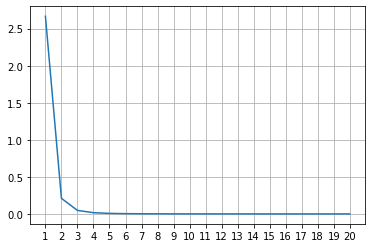

In [24]:
x = np.linspace(1,20,20)
mean = 1.6
print(mean,steepness_from_mean(mean))
y = power_law(x,steepness_from_mean(mean))
print(y)
plt.plot(x,y)
plt.grid()
plt.xticks(np.linspace(1,20,20))
#for i in range(0,10):
    